In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load synthetic test data

In [20]:
root = "C:/users/yabec/desktop/dependencynet/"
network = pd.read_csv(root+'githubcode/testdata.xz')

In [21]:
network.head()

,poi_a,poi_b,dep,uid_a,uid_b,poilon_a,poilat_a,Taxonomy_a,cat_a,poilon_b,poilat_b,Taxonomy_b,cat_b,distance
0,38150,10998,0.004141,4951.707804,6021.219315,-1.014391,1.735001,Food,Full-Service Restaurants,-1.092607,1.692342,Entertainment,Casinos (except Casino Hotels),9.800212
1,38150,93026,0.004767,4951.707804,1789.646276,-1.014391,1.735001,Food,Full-Service Restaurants,-1.023338,1.767790,Shopping,"Beer, Wine, and Liquor Stores",3.738653
2,38150,21954,0.003133,4951.707804,826.494375,-1.014391,1.735001,Food,Full-Service Restaurants,-1.218628,1.769983,Food,Full-Service Restaurants,22.793235
3,38150,12616,0.002829,4951.707804,9950.603032,-1.014391,1.735001,Food,Full-Service Restaurants,-1.116715,1.775394,Sports,Fitness and Recreational Sports Centers,12.100898
4,38150,7470,0.009958,4951.707804,4310.283458,-1.014391,1.735001,Food,Full-Service Restaurants,-1.011438,1.717937,Food,Full-Service Restaurants,1.904939


# Figure 1b (network diagram)
* create input data from 'network' data and use 'drawnetwork.R' to create visualization

In [63]:
cat_count = network.groupby('Taxonomy_a')['poi_a'].nunique().reset_index()
cat_count.columns = ['Taxonomy','num']

In [72]:
networkviz_input = (network.groupby(['Taxonomy_a','Taxonomy_b','cat_a','cat_b'])
                    .agg({'dep':'sum','poi_a':'count'}).reset_index().rename(columns={'poi_a':'dep_count'}))

In [73]:
networkviz_input = (networkviz_input.merge(cat_count, left_on='Taxonomy_a', right_on='Taxonomy', how='left')
                    .merge(cat_count, left_on='Taxonomy_b', right_on='Taxonomy', how='left'))

In [74]:
networkviz_input['prod'] = networkviz_input['num_x']*networkviz_input['num_y']
networkviz_input['dep_avg'] = networkviz_input['dep']/networkviz_input['prod']*10000
networkviz_input = networkviz_input[['Taxonomy_a','Taxonomy_b','cat_a','cat_b','dep','dep_count','prod','dep_avg']]

In [75]:
networkviz_input.to_csv(root+'githubcode/networkvizinput.csv', index=False)

In [76]:
networkviz_input

,Taxonomy_a,Taxonomy_b,cat_a,cat_b,dep,dep_count,prod,dep_avg
0,Arts / Museum,Arts / Museum,Art Dealers,Museums,0.033103,5,5476,0.060451
1,Arts / Museum,Arts / Museum,Art Dealers,"Promoters of Performing Arts, Sports, and Simi...",0.097054,8,5476,0.177235
2,Arts / Museum,Arts / Museum,Museums,Art Dealers,0.225237,5,5476,0.411317
3,Arts / Museum,Arts / Museum,Museums,Museums,0.286683,8,5476,0.523527
4,Arts / Museum,Arts / Museum,Museums,"Promoters of Performing Arts, Sports, and Simi...",0.090562,7,5476,0.165381
...,...,...,...,...,...,...,...,...
6966,Transportation,Transportation,Commuter Rail Systems,Bus and Other Motor Vehicle Transit Systems,0.262904,27,641601,0.004098
6967,Transportation,Transportation,Commuter Rail Systems,Commuter Rail Systems,0.041172,2,641601,0.000642
6968,Transportation,Transportation,Commuter Rail Systems,Mixed Mode Transit Systems,0.004406,1,641601,0.000069
6969,Transportation,Transportation,Mixed Mode Transit Systems,Bus and Other Motor Vehicle Transit Systems,0.209085,35,641601,0.003259


# Figure 1c,d,e (statistics of network)

In [26]:
def round_into_bins(val,bins):
    if (val>3) | (val<-2):
        return np.nan
    else:
        for b in bins:
            if val<b:
                return b
        return 3
bins = np.loadtxt(root+'githubcode/20000_bins.txt', dtype=float)

In [27]:
inweight  = network.groupby('poi_b')['dep'].sum().reset_index()
outweight = network.groupby('poi_a')['dep'].sum().reset_index()
network['logdist'] = network['distance'].apply(lambda x: round_into_bins(np.log10(x+0.001),bins))
dist_weight = network.groupby('logdist').agg({'dep':['mean','sum','count']}).reset_index()
dist_weight.columns = ['logdist','avg','sum','count']

## example plot (distribution of in weights)

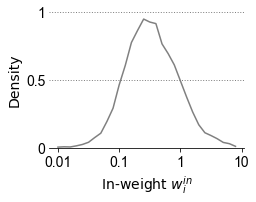

In [36]:
fig,ax = plt.subplots(1,1, figsize=(3.5,2.5))

x = np.histogram(np.log10(inweight['dep']), bins=30, density=True, range=[-2,1])
ax.plot(x[1][:-1],x[0],color='gray')

xtic = [-2,-1,0,1]
xtixlab = [0.01,0.1,1,10]
ytic = [0,0.5,1]
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('In-weight '+r'$w_i^{in}$', fontsize=14)
ax.set_ylabel("Density", fontsize=14, rotation=90, labelpad=5, y=.5)
ax.set_xticks(xtic)
ax.set_xticklabels(xtixlab, fontsize=14, family='Arial')
ax.set_ylim(0)
ax.set_yticks(ytic)
ax.set_yticklabels(ytic, fontsize=14, family='Arial')
for yla in ytic:
    ax.axhline(yla, linestyle=':', linewidth=1, color='gray', zorder=1)
ax.tick_params(axis=u'y', which=u'both',length=0)
plt.show()